In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Feature Scaling
from sklearn.preprocessing import RobustScaler

# Visaulization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier (machine learning algorithm)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import LeavePOut
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Evaluation
from sklearn.model_selection import cross_val_score, cross_val_predict

# Parameter Tuning
from sklearn.model_selection import GridSearchCV

# Settings
pd.options.mode.chained_assignment = None # Stop warning when use inplace=True of fillna

train = pd.read_csv("sfpd-dispatch/sfpd_dispatch_data_subset.csv", index_col=0)
#train.head()
# test = pd.read_csv("test_final.csv", index_col=0)

In [2]:
train.describe()

,call_number,incident_number,zipcode_of_incident,station_area,box,final_priority,number_of_alarms,unit_sequence_in_call_dispatch,supervisor_district,neighborhood_district,latitude,longitude
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,0.0,10000.000000,10000.000000
mean,1.801872e+08,1.800791e+07,94113.473000,18.066600,4019.476500,2.707500,1.010300,2.149500,5.97940,NaN,37.769307,-122.424785
std,3.457123e+04,1.417024e+03,10.490342,14.350699,2327.782885,0.454933,0.134892,2.308264,2.63387,NaN,0.024040,0.026703
min,1.801300e+08,1.800543e+07,94102.000000,1.000000,131.000000,2.000000,1.000000,1.000000,1.00000,NaN,37.708624,-122.513648
25%,1.801537e+08,1.800669e+07,94103.750000,5.000000,2117.000000,2.000000,1.000000,1.000000,4.00000,NaN,37.755331,-122.435552
50%,1.801902e+08,1.800793e+07,94110.000000,14.000000,3426.000000,3.000000,1.000000,2.000000,6.00000,NaN,37.777624,-122.417478
75%,1.802201e+08,1.800914e+07,94121.000000,32.000000,5667.000000,3.000000,1.000000,2.000000,8.00000,NaN,37.785442,-122.408386
max,1.802442e+08,1.801035e+07,94158.000000,51.000000,8871.000000,3.000000,3.000000,40.000000,11.00000,NaN,37.831666,-122.365138


In [3]:
train.isnull().sum()

call_number                           0
unit_id                               0
incident_number                       0
call_type                             0
call_date                             0
watch_date                            0
received_timestamp                    0
entry_timestamp                       0
dispatch_timestamp                    0
response_timestamp                  261
on_scene_timestamp                 1915
transport_timestamp                7031
hospital_timestamp                 7087
call_final_disposition                0
available_timestamp                   0
address                               0
city                                 18
zipcode_of_incident                   0
battalion                             0
station_area                          0
box                                   0
original_priority                     0
priority                              0
final_priority                        0
als_unit                              0


In [4]:
# This fills all the nan spots with the text 'nan'
train = train.fillna('nan')

In [5]:
# takes about 4 minutes
#Dictionary the values for processing

train['call_type'] = train['call_type'].map({'Medical Incident' : 0, 'Alarms' : 1, 'Structure Fire' : 2, 'Traffic Collision' : 3, 'Outside Fire' : 4, 'Other' : 5, 'Train / Rail Incident' : 6, 'Citizen Assist / Service Call' : 7, 'Electrical Hazard' : 8, 'Elevator / Escalator Rescue' : 9, 'Fuel Spill' : 10, 'Gas Leak (Natural and LP Gases)' : 11, 'Water Rescue' : 12, 'Vehicle Fire' : 13, 'Smoke Investigation (Outside)' : 14, 'Odor (Strange / Unknown)' : 15, 'HazMat' : 16 }).astype(int)
train['call_final_disposition'] = train['call_final_disposition'].map({'Code 2 Transport' : 0, 'Fire' : 1, 'Code 3 Transport' : 2, 'Patient Declined Transport' : 3, 'No Merit' : 4, 'Medical Examiner' : 5, 'Against Medical Advice' : 6, 'Cancelled' : 7, 'Unable to Locate' : 8, 'SFPD' : 9, 'Gone on Arrival' : 10, 'Other' : 11}).astype(int)
train['city'] = train['city'].map({'nan' : 0, 'San Francisco' : 1, 'Presidio' : 2, 'Treasure Isla' : 3, 'Yerba Buena' : 4, 'Hunters Point' : 5, 'Fort Mason' : 6 }).astype(int)
train['battalion'] = train['battalion'].map({'B99': 0, 'B01': 1, 'B02': 2, 'B03': 3, 'B04': 4, 'B05': 5, 'B06': 6, 'B07': 7, 'B08': 8, 'B09': 9, 'B10': 10 }).astype(int)
train['original_priority'] = train['original_priority'].map({'I' : 1, '2' : 2, '3' : 3, 'A' : 4, 'B' : 5, 'C' : 6, 'E' : 7}).astype(int)
train['priority'] = train['priority'].map({'I' : 1, '2' : 2, '3' : 3, 'E' : 4}).astype(int)
train['als_unit'] = train['als_unit'].map({True : 1, False : 0}).astype(int)
train['call_type_group'] = train['call_type_group'].map({'nan' : 0, 'Non Life-threatening' : 1, 'Potentially Life-Threatening' : 2, 'Alarm' : 3, 'Fire' : 4}).astype(int)

#Create a travel duration column
for k in range(0,train.shape[0]):
    train['call_date'][k] = int(train['call_date'][k][2:4])
    train['watch_date'][k] = int(train['watch_date'][k][2:4])
    
    timestamps = ['received_timestamp','entry_timestamp','dispatch_timestamp','response_timestamp','on_scene_timestamp','transport_timestamp','hospital_timestamp','available_timestamp']
    
    for stamp in timestamps:
        if train[stamp][k]=='nan':
            train[stamp][k] = 0
        else:
            train[stamp][k] = int(train[stamp][k][17:19]) + 60 * int(train[stamp][k][14:16]) + 3600 * int(train[stamp][k][11:13]) + 3600 * 24 * int(train[stamp][k][8:10])

train['unit_type'] = train['unit_type'].map({'ENGINE' : 0, 'MEDIC' : 1, 'PRIVATE' : 2, 'TRUCK' : 3, 'CHIEF' : 4, 'RESCUE CAPTAIN' : 5, 'RESCUE SQUAD' : 6, 'SUPPORT' : 7, 'INVESTIGATION' : 8 }).astype(int)

In [6]:
#remove noisy data such as neighbouhood_district and call_number for faster processing
drop_elements=['call_number','incident_number','call_date','watch_date','neighborhood_district','zipcode_of_incident','station_area','address','city','location','supervisor_district']
train = train.drop(drop_elements, axis = 1)

In [7]:
#encode missing times as 99999, will be used for checks
train['travel_duration'] = train['on_scene_timestamp']-train['dispatch_timestamp']
for k in range(0, train.shape[0]):
    temp = int(train['travel_duration'][k])
    if (temp > 1500):
        train['travel_duration'][k] = 99999
    if (temp <= 0):
        train['travel_duration'][k] = 99999

In [8]:
#set bins for graph
ranges = list(np.arange(0,2000,60))
incidences_per_unit_type = pd.DataFrame(train.groupby(pd.cut(train.travel_duration, ranges)).count()["unit_type"])
incidences_per_unit_type.columns = ["count"]

#set parameters for plot
ax = incidences_per_unit_type.plot.bar(figsize=(15,12), fontsize = 12, legend = False, color = "palegreen")#counts per elevation
ax.set_xlabel("Time to Arrive (s)", fontsize = 16)
ax.set_ylabel("Count of Fire Department Calls", fontsize = 16)
ax.set_title("Count of Fire Department Calls to Response Time", fontsize = 20)
plt.savefig("bin_check.png")

In [9]:
def get_cat(col, cat):
    for token in col:
        if(token > 2000):
            cat.append('Other')
        else:
            chunks = []
            temp = int(int(token)/60)
            min = temp * 60
            max = min + 60
            chunks = ['(', str(min), ', ', str(max), ']']
            category = ''.join(chunks)
            cat.append(str(category))
            
Response_time = []

get_cat(train["travel_duration"].tolist(), Response_time)
train["response_cat"] = Response_time

train['response_cat']

temp
MEDIC              (840, 900]
MEDIC              (780, 840]
ENGINE             (180, 240]
ENGINE             (120, 180]
CHIEF              (180, 240]
ENGINE             (180, 240]
ENGINE             (480, 540]
MEDIC              (360, 420]
ENGINE             (240, 300]
MEDIC              (240, 300]
MEDIC             (960, 1020]
MEDIC              (360, 420]
ENGINE             (180, 240]
PRIVATE            (540, 600]
MEDIC              (240, 300]
RESCUE SQUAD       (300, 360]
ENGINE             (300, 360]
ENGINE             (300, 360]
MEDIC              (300, 360]
TRUCK                   Other
MEDIC              (300, 360]
ENGINE             (180, 240]
ENGINE             (180, 240]
ENGINE             (120, 180]
MEDIC              (360, 420]
MEDIC              (300, 360]
MEDIC              (180, 240]
MEDIC                   Other
MEDIC              (420, 480]
ENGINE                (0, 60]
                     ...     
ENGINE             (180, 240]
ENGINE             (240, 300]
MEDIC

In [10]:
#set minute categories
train['response_cat'] = train['response_cat'].map({'(0, 60]' : 1, '(60, 120]' : 2, '(120, 180]' : 3, '(180, 240]' : 4, '(240, 300]' : 5, '(300, 360]' : 6, '(360, 420]' : 7, '(420, 480]' : 8, '(480, 540]' : 9, '(540, 600]' : 10, '(600, 660]' : 11, '(660, 720]' : 12, '(720, 780]' : 13, '(780, 840]' : 14, '(840, 900]' : 15, '(900, 960]' : 16, '(960, 1020]' : 17, '(1020, 1080]' : 18, '(1080, 1140]' : 19, '(1140, 1200]' : 20, '(1200, 1260]' : 21, '(1260, 1320]' : 22, '(1320, 1380]' : 23, '(1380, 1440]' : 24, '(1440, 1500]' : 25, '(1500, 1560]' : 26, 'Other' : 0 }).astype(int)

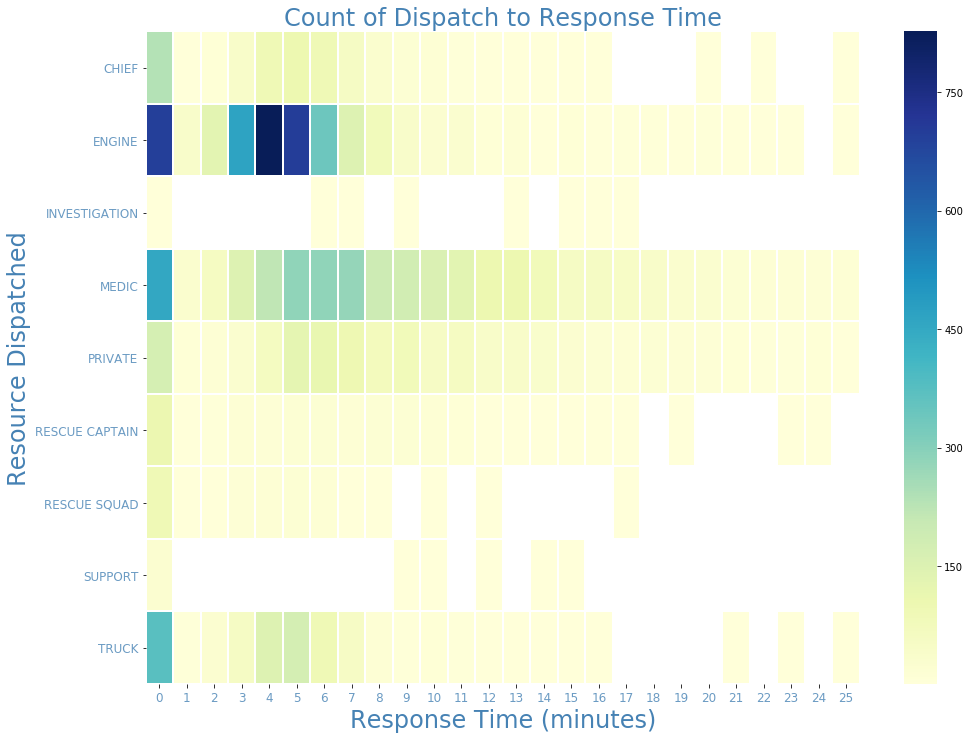

In [11]:
%matplotlib inline
plt.figure(figsize=(16,12))
incidence_count_matrix_long = pd.DataFrame({'count' : train.groupby( [ "temp","response_cat"] ).size()}).reset_index()
incidence_count_matrix_pivot = incidence_count_matrix_long.pivot("temp","response_cat","count") 
ax = sns.heatmap(incidence_count_matrix_pivot, annot=False, fmt="d", linewidths=1, square = False, cmap="YlGnBu")
ax = plt.xticks(fontsize = 12,color="steelblue", alpha=0.8)
ax = plt.yticks(fontsize = 12,color="steelblue", alpha=0.8)
ax = plt.xlabel("Response Time (minutes)", fontsize = 24, color="steelblue")
ax = plt.ylabel("Resource Dispatched", fontsize = 24, color="steelblue")
ax = plt.title("Count of Dispatch to Response Time", fontsize = 24, color="steelblue")
plt.savefig('Dispatch_response.png')

In [12]:
train_original = pd.read_csv("sfpd-dispatch/sfpd_dispatch_data_subset.csv", index_col=0)

In [13]:
def get_day_time(col, days, hours, months, years):
    for token in col:
        day = int(token.split()[0].split("-")[2])
        month = int(token.split()[0].split("-")[1])
        year = int(token.split()[0].split("-")[0])
        hour = int(token.split()[1].split(":")[0])
        days.append(day) 
        months.append(month)
        years.append(year)
        hours.append(hour)
        
hours = []
days = []
months = []
years = []

get_day_time(train_original["received_timestamp"].tolist(), days, hours, months, years)
train_original["received_hour"] = hours
train_original["received_day"] = days
train_original["received_month"] = months
train_original["received_year"] = years

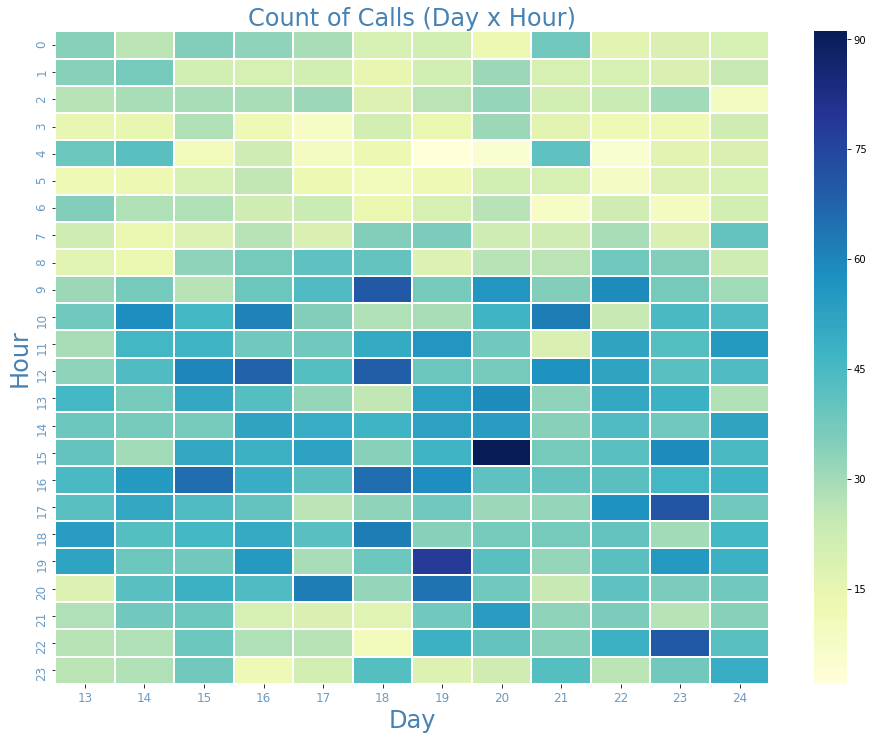

In [14]:
%matplotlib inline
plt.figure(figsize=(16,12))
incidence_count_matrix_long = pd.DataFrame({'count' : train_original.groupby( [ "received_hour","received_day"] ).size()}).reset_index()
incidence_count_matrix_pivot = incidence_count_matrix_long.pivot("received_hour","received_day","count") 
ax = sns.heatmap(incidence_count_matrix_pivot, annot=False, fmt="d", linewidths=1, square = False, cmap="YlGnBu")
ax = plt.xticks(fontsize = 12,color="steelblue", alpha=0.8)
ax = plt.yticks(fontsize = 12,color="steelblue", alpha=0.8)
ax = plt.xlabel("Day", fontsize = 24, color="steelblue")
ax = plt.ylabel("Hour", fontsize = 24, color="steelblue")
ax = plt.title("Count of Calls (Day x Hour)", fontsize = 24, color="steelblue")
plt.savefig("call_day.png")

In [15]:
train.head()

,unit_id,call_type,received_timestamp,entry_timestamp,dispatch_timestamp,response_timestamp,on_scene_timestamp,transport_timestamp,hospital_timestamp,call_final_disposition,...,call_type_group,number_of_alarms,unit_sequence_in_call_dispatch,fire_prevention_district,row_id,latitude,longitude,unit_type,travel_duration,response_cat
temp,,,,,,,,,,,,,,,,,,,,,
MEDIC,84,0,2136976,2137101,2137181,2137185,2138022,2139392,2141048,0,...,1,1,1,7,180243072-84,37.774442,-122.504679,1,841,15
MEDIC,61,0,2099105,2099105,2099131,2099145,2099942,0,0,0,...,1,1,1,2,180240538-61,37.774095,-122.420001,1,811,14
ENGINE,E22,0,2081061,2081137,2081164,2081246,2081402,0,0,0,...,2,1,1,8,180240176-E22,37.755218,-122.475540,0,238,4
ENGINE,E03,1,2145855,2145912,2145924,2145936,2146097,0,0,1,...,3,1,1,4,180243588-E03,37.790319,-122.423163,0,173,3
CHIEF,B03,1,2145788,2145936,2145957,2146016,2146155,0,0,1,...,3,1,3,3,180243590-B03,37.777328,-122.393089,4,198,4


In [42]:
def get_hour(col, hours):
    for token in col:
        hour = int(token.split()[1].split(":")[0])
        hours.append(hour)
        
#knn_data_subset.csv is a cleaned up data set only containing unit_type, latitude, longitude, and received_timestamp
hours = []
train_knn = pd.read_csv("sfpd-dispatch/knn_data_subset.csv", index_col=0)
get_hour(train_knn["received_timestamp"].tolist(), hours)
train_knn["hour"] = hours

In [43]:
y = train_knn.unit_type
train_knn = train_knn.drop("received_timestamp", axis = 1)
train_knn = train_knn.drop("unit_type", axis = 1)
X = train_knn
X.head()

,longitude,hour
latitude,,
37.774442,-122.504679,17
37.774095,-122.420001,7
37.755218,-122.475540,2
37.790319,-122.423163,20
37.777328,-122.393089,20


In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

In [164]:
print ("\nX_train:\n")
print(X_train.head())
print (X_train.shape)
print ("\nX_test:\n")
print(X_test.head())
print (X_test.shape)


X_train:

            longitude  hour
latitude                   
37.781217 -122.457001    15
37.782724 -122.396168    10
37.797865 -122.396701    19
37.751994 -122.409123    11
37.709148 -122.419780    13
(2000, 2)

X_test:

            longitude  hour
latitude                   
37.752373 -122.416266    14
37.777624 -122.399981    12
37.764138 -122.402572    19
37.788945 -122.426252    16
37.734027 -122.432838    11
(8000, 2)


In [170]:
#odd number, cho
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def get_k(X_train, y_train, X_test, k, acc):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    acc.append(accuracy_score(y_test, predictions))

In [171]:
k = []
acc = []
for i in range(2, 50):
    get_k(X_train, y_train, X_test, i, acc)
    k.append(i)
print(k)
print(acc)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0.269125, 0.27174999999999999, 0.28437499999999999, 0.30112499999999998, 0.31225000000000003, 0.31737500000000002, 0.32324999999999998, 0.325625, 0.32737500000000003, 0.330125, 0.33200000000000002, 0.33200000000000002, 0.33350000000000002, 0.33537499999999998, 0.33650000000000002, 0.33612500000000001, 0.33424999999999999, 0.33650000000000002, 0.33712500000000001, 0.33450000000000002, 0.33774999999999999, 0.34037499999999998, 0.33975, 0.33850000000000002, 0.34012500000000001, 0.33975, 0.34237499999999998, 0.34625, 0.34762500000000002, 0.34549999999999997, 0.34362500000000001, 0.34312500000000001, 0.34350000000000003, 0.34899999999999998, 0.34762500000000002, 0.34637499999999999, 0.34487499999999999, 0.34787499999999999, 0.34525, 0.34787499999999999, 0.34637499999999999, 0.34562500000000002, 0.34337499999

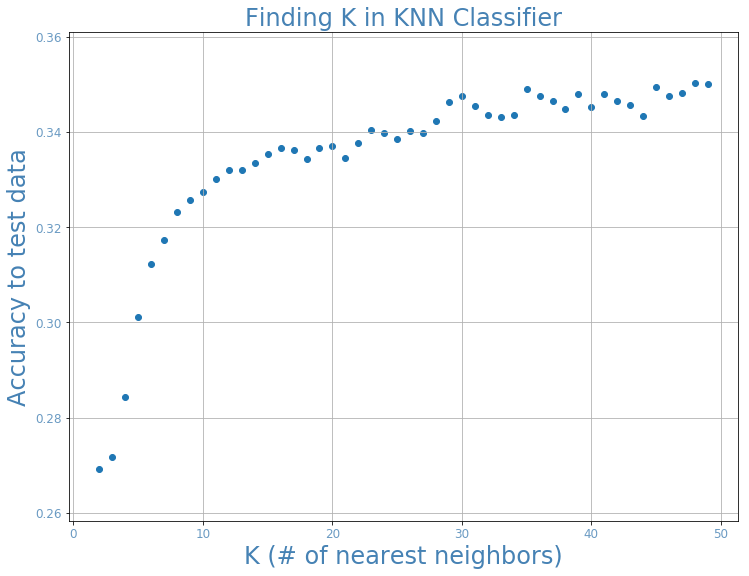

In [178]:
plt.figure(figsize=(12,9))
plt.scatter(k,acc)
ax = plt.xticks(fontsize = 12,color="steelblue", alpha=0.8)
ax = plt.yticks(fontsize = 12,color="steelblue", alpha=0.8)
ax = plt.xlabel('K (# of nearest neighbors)', fontsize = 24, color="steelblue")
ax = plt.ylabel('Accuracy to test data', fontsize = 24, color="steelblue")
ax = plt.title('Finding K in KNN Classifier', fontsize = 24, color="steelblue")
plt.grid(True)
plt.savefig("knn.png")


In [16]:
import numpy as np
import matplotlib.pyplot as plt

mapdata = np.loadtxt("sfpd-dispatch/sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

In [18]:
# trainP = train[train.call_type == 'Medical Incident']
np.seterr(divide='ignore', invalid='ignore')
trainP = train_original.dropna()

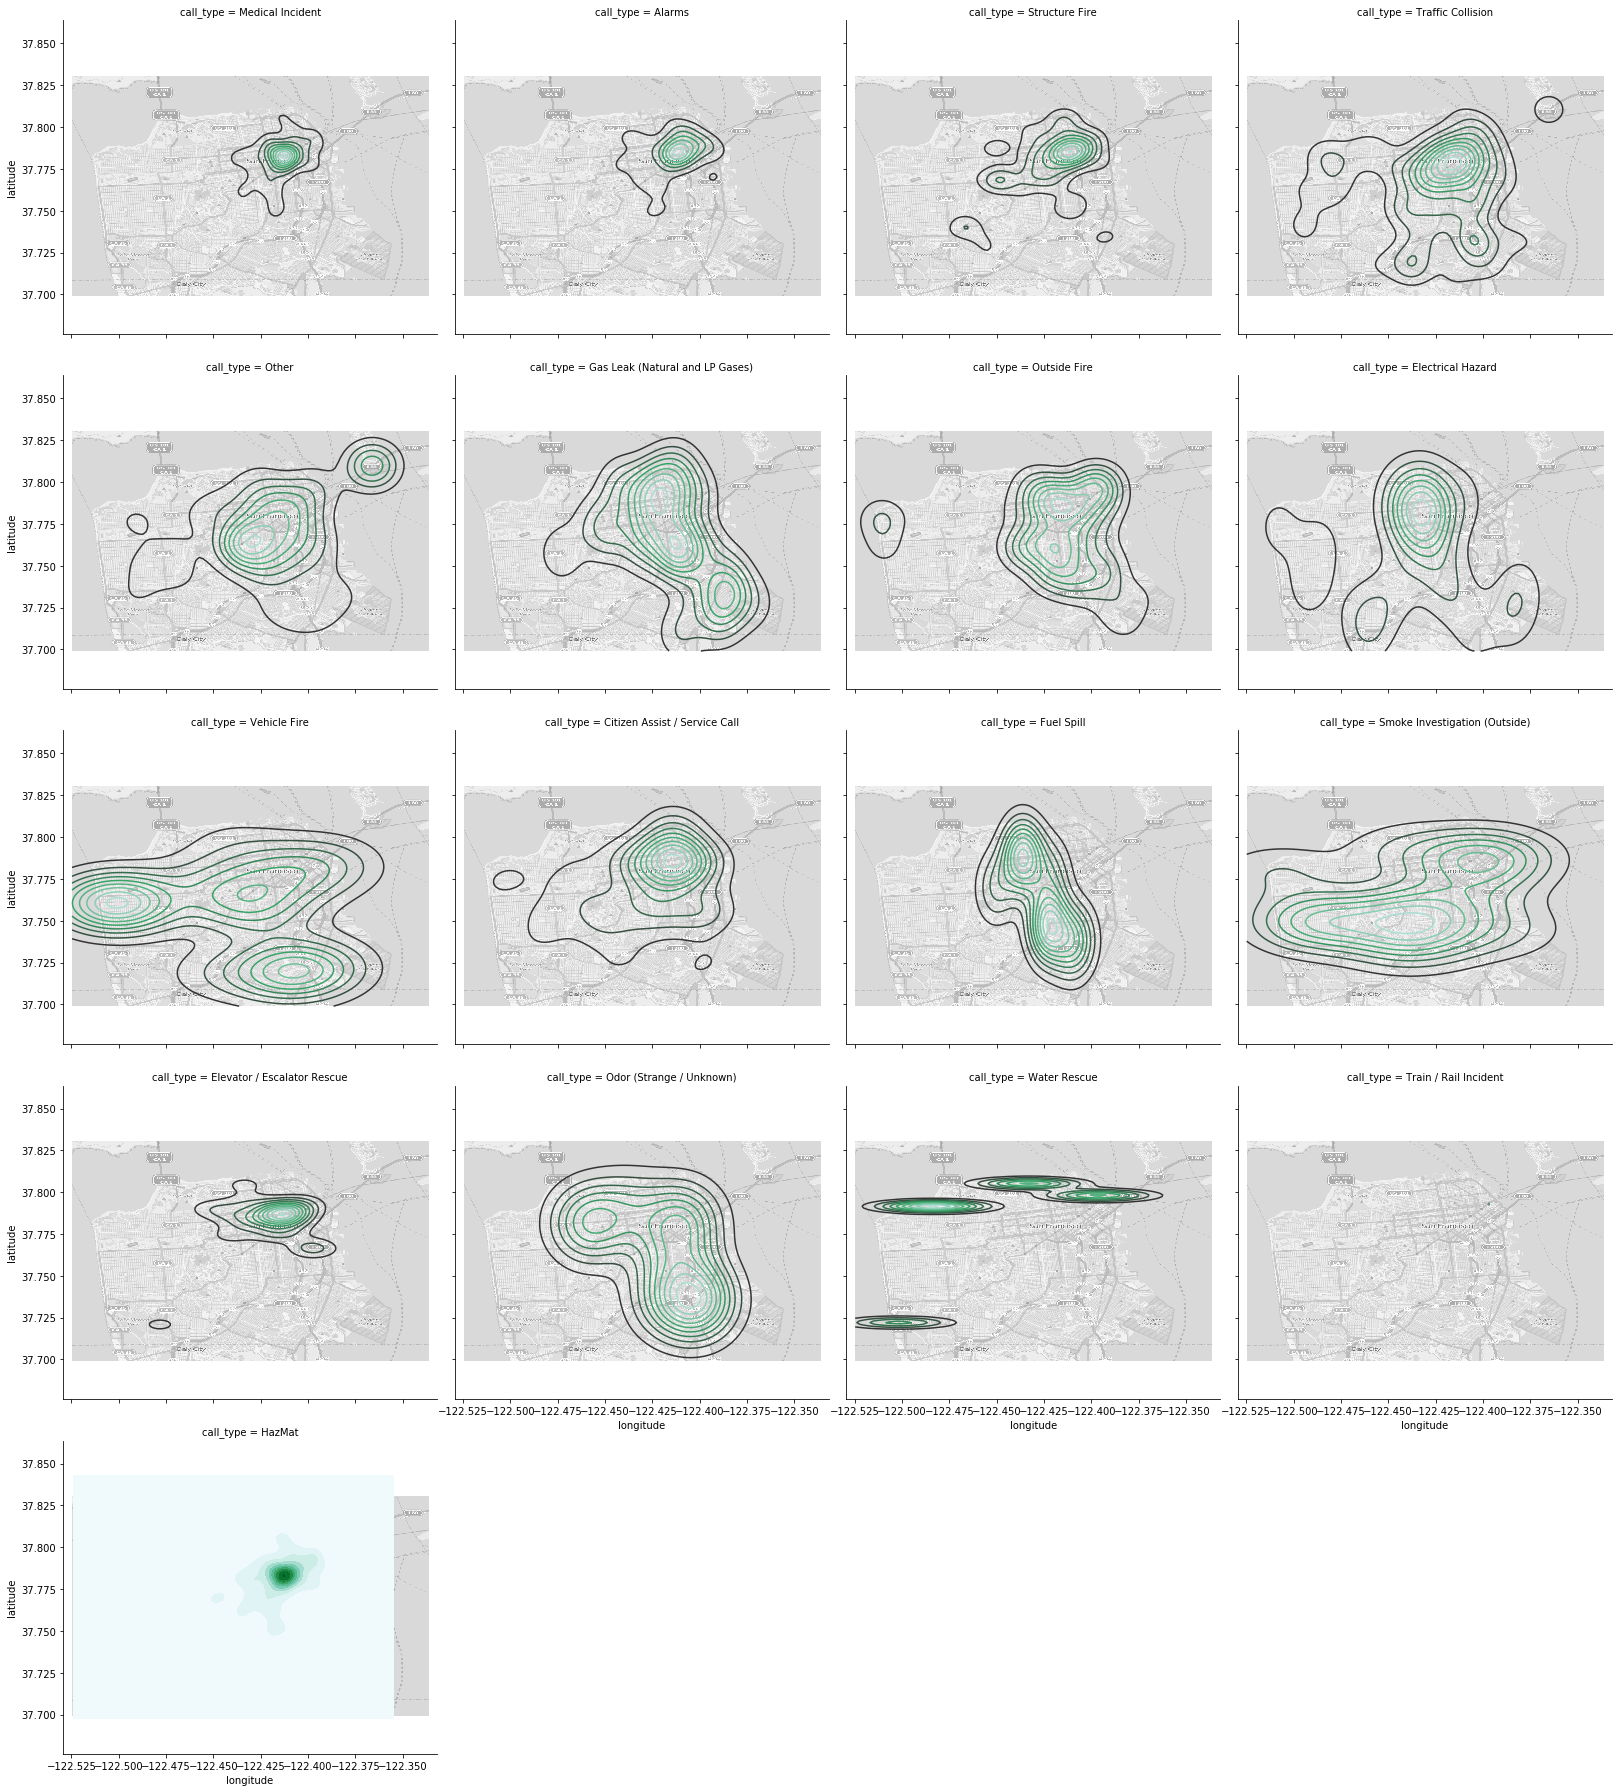

In [179]:
import warnings
warnings.filterwarnings("ignore")
g= sns.FacetGrid(train_original, col="call_type", col_wrap=4, size=5, aspect=1/asp)

#Show the background map
for ax in g.axes:
    ax.imshow(mapdata, cmap=plt.get_cmap('gray'),alpha = 0.6, 
              extent=lon_lat_box, 
              aspect=asp)
#Kernel Density Estimate plot
sns.kdeplot(train_original.longitude, train_original.latitude, shade = True)
g.map(sns.kdeplot, "longitude", "latitude", clip=clipsize)
plt.savefig('call_density_plot.png')


In [ ]:
#Create a gif using the 25 images created to show heatmap over response time!

my_list=list(range(1,27))

for x in range(1, 27):
    trainP = train[train['response_cat'] == x]
    plt.figure(figsize=(20,20*asp))
    plt.title('Response within ' + str(x) + ' minutes', fontsize = 48, color="steelblue")
    try:
        ax = sns.kdeplot(trainP.longitude, trainP.latitude, clip=clipsize)
    except ZeroDivisionError:
        print("\n")
    ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
                extent=lon_lat_box)
    plt.savefig(str(x)+'_density_plot.png')

In [27]:
sum = 0
count = 0
for i in train['travel_duration'].tolist():
    if(i > 1500):
        continue
    else:
        sum += i
        count += 1
print("avg response time is " + str(sum/count) + "seconds")

avg response time is 381.4806784848871seconds


In [28]:
sum = 0
count = 0
trainc = train[train.unit_type == 0]
for i in trainc['travel_duration'].tolist():
    if(i > 1500):
        continue
    else:
        sum += i
        count += 1
print("avg engine response time is " + str(sum/count) + "seconds")

avg engine response time is 262.61057360055287seconds


In [29]:
sum = 0
count = 0
trainc = train[train.unit_type == 1]
for i in trainc['travel_duration'].tolist():
    if(i > 1500):
        continue
    else:
        sum += i
        count += 1
print("avg medic response time is " + str(sum/count) + "seconds")

avg medic response time is 496.4316877152698seconds
